## 8. Write and execute programs to remove noise using spatial filters

# a.Understand 1-D and 2-D convolution process

# b.Use 3x3 Mask for low pass filter and high pass filter

1D Convolution Result:
[ 4  7 10 13 10]


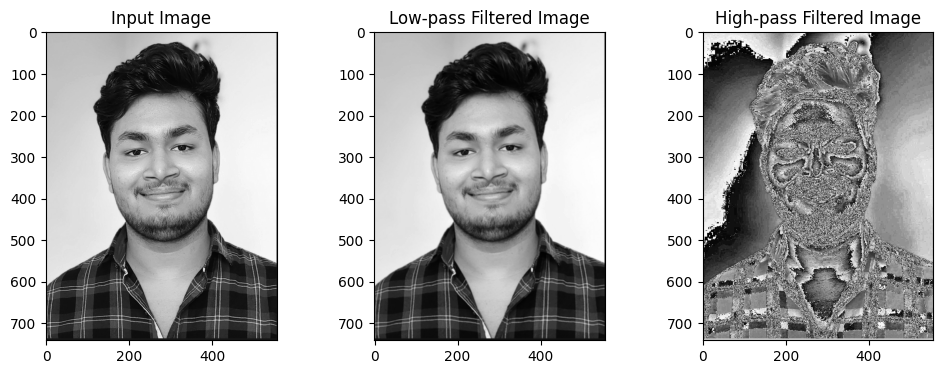

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1D Convolution
def convolve_1d(signal, kernel):
    """
    Performs 1D convolution of a signal with a kernel.
    
    Parameters:
    signal (numpy.ndarray): 1D input signal.
    kernel (numpy.ndarray): 1D kernel.
    
    Returns:
    numpy.ndarray: Convolved signal.
    """
    padded_signal = np.pad(signal, (len(kernel) // 2, len(kernel) // 2), mode='constant')
    convolved_signal = np.zeros_like(signal)
    
    for i in range(len(signal)):
        convolved_signal[i] = np.sum(padded_signal[i:i+len(kernel)] * kernel)
    
    return convolved_signal

# 2D Convolution
def convolve_2d(image, kernel):
    """
    Performs 2D convolution of an image with a kernel.
    
    Parameters:
    image (numpy.ndarray): 2D input image.
    kernel (numpy.ndarray): 2D kernel.
    
    Returns:
    numpy.ndarray: Convolved image.
    """
    padded_image = np.pad(image, ((len(kernel) // 2, len(kernel) // 2), (len(kernel) // 2, len(kernel) // 2)), mode='constant')
    convolved_image = np.zeros_like(image)
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            convolved_image[i, j] = np.sum(padded_image[i:i+len(kernel), j:j+len(kernel)] * kernel)
    
    return convolved_image

# Low-pass Filter
def low_pass_filter(image, kernel_size=3):
    """
    Applies a low-pass filter to the input image using a 3x3 kernel.
    
    Parameters:
    image (numpy.ndarray): 2D input image.
    kernel_size (int): Size of the kernel (default is 3).
    
    Returns:
    numpy.ndarray: Filtered image.
    """
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    filtered_image = convolve_2d(image, kernel)
    return filtered_image

# High-pass Filter
def high_pass_filter(image, kernel_size=3):
    """
    Applies a high-pass filter to the input image using a 3x3 kernel.
    
    Parameters:
    image (numpy.ndarray): 2D input image.
    kernel_size (int): Size of the kernel (default is 3).
    
    Returns:
    numpy.ndarray: Filtered image.
    """
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / -(kernel_size ** 2)
    kernel[kernel_size // 2, kernel_size // 2] = kernel_size ** 2
    filtered_image = convolve_2d(image, kernel)
    return filtered_image

# 1D Convolution Example
signal = np.array([1, 2, 3, 4, 5])
kernel = np.array([0, 2, 1])

convolved_signal = convolve_1d(signal, kernel)
print("1D Convolution Result:")
print(convolved_signal)

# Example usage
# Load the input image
input_image = np.array(Image.open('Vp.jpg').convert('L'))

# Apply low-pass filter
low_pass_image = low_pass_filter(input_image)

# Apply high-pass filter
high_pass_image = high_pass_filter(input_image)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(low_pass_image, cmap='gray')
ax[1].set_title('Low-pass Filtered Image')
ax[2].imshow(high_pass_image, cmap='gray')
ax[2].set_title('High-pass Filtered Image')
plt.show()

## 9  a. GUI program for Power Law Transformation:

In [1]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np

def power_law_transform(image, gamma):
    """
    Applies power law transformation to the input image.
    
    Parameters:
    image (numpy.ndarray): Input image.
    gamma (float): Gamma value for the power law transformation.
    
    Returns:
    numpy.ndarray: Transformed image.
    """
    transformed_image = np.power(image / 255.0, gamma) * 255
    return transformed_image.astype(np.uint8)

def update_image(gamma):
    """
    Updates the displayed image with the power law transformation.
    
    Parameters:
    gamma (float): Gamma value for the power law transformation.
    """
    transformed_image = power_law_transform(original_image, gamma)
    photo = ImageTk.PhotoImage(Image.fromarray(transformed_image))
    image_label.configure(image=photo)
    image_label.image = photo

def gui():
    """
    Creates the GUI for the power law transformation.
    """
    root = tk.Tk()
    root.title("Power Law Transformation")

    global original_image
    original_image = np.array(Image.open("img.jpg"))

    global image_label
    image_label = tk.Label(root)
    image_label.pack()

    gamma_scale = tk.Scale(root, from_=0.1, to=5.0, resolution=0.1, orient=tk.HORIZONTAL, command=update_image)
    gamma_scale.set(1.0)
    gamma_scale.pack(pady=20)

    root.mainloop()

if __name__ == "__main__":
    gui()

2024-04-22 18:43:38.411 Python[69514:2273539] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/tkinter/__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "/var/folders/fv/46rxyz2d5nsd2v4dx6cl6c_r0000gn/T/ipykernel_69514/1577204521.py", line 26, in update_image
    transformed_image = power_law_transform(original_image, gamma)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/fv/46rxyz2d5nsd2v4dx6cl6c_r0000gn/T/ipykernel_69514/1577204521.py", line 16, in power_law_transform
    transformed_image = np.power(image / 255.0, gamma) * 255
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: ufunc 'power' not supported for the in

## b. GUI program for Intensity Level Slicing and Bit-level Slicing:

In [2]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np

def intensity_level_slicing(image, low, high):
    """
    Applies intensity level slicing to the input image.
    
    Parameters:
    image (numpy.ndarray): Input image.
    low (int): Lower intensity threshold.
    high (int): Upper intensity threshold.
    
    Returns:
    numpy.ndarray: Transformed image.
    """
    transformed_image = np.clip(image, low, high)
    transformed_image = (transformed_image - low) * 255 / (high - low)
    return transformed_image.astype(np.uint8)

def bit_level_slicing(image, start_bit, end_bit):
    """
    Applies bit-level slicing to the input image.
    
    Parameters:
    image (numpy.ndarray): Input image.
    start_bit (int): Starting bit position (0-7).
    end_bit (int): Ending bit position (0-7).
    
    Returns:
    numpy.ndarray: Transformed image.
    """
    mask = 0
    for bit in range(start_bit, end_bit + 1):
        mask |= (1 << bit)
    transformed_image = (image & mask) >> start_bit
    transformed_image = (transformed_image * 255 / (2 ** (end_bit - start_bit + 1))).astype(np.uint8)
    return transformed_image

def update_intensity_slicing(low, high):
    """
    Updates the displayed image with the intensity level slicing.
    
    Parameters:
    low (int): Lower intensity threshold.
    high (int): Upper intensity threshold.
    """
    transformed_image = intensity_level_slicing(original_image, low, high)
    photo = ImageTk.PhotoImage(Image.fromarray(transformed_image))
    image_label.configure(image=photo)
    image_label.image = photo

def update_bit_slicing(start_bit, end_bit):
    """
    Updates the displayed image with the bit-level slicing.
    
    Parameters:
    start_bit (int): Starting bit position (0-7).
    end_bit (int): Ending bit position (0-7).
    """
    transformed_image = bit_level_slicing(original_image, start_bit, end_bit)
    photo = ImageTk.PhotoImage(Image.fromarray(transformed_image))
    image_label.configure(image=photo)
    image_label.image = photo

def gui():
    """
    Creates the GUI for intensity level slicing and bit-level slicing.
    """
    root = tk.Tk()
    root.title("Intensity Level Slicing and Bit-level Slicing")

    global original_image
    original_image = np.array(Image.open("img.jpg"))

    global image_label
    image_label = tk.Label(root)
    image_label.pack()

    # Intensity Level Slicing
    intensity_label = tk.Label(root, text="Intensity Level Slicing")
    intensity_label.pack(pady=10)

    low_scale = tk.Scale(root, from_=0, to=255, orient=tk.HORIZONTAL, command=lambda x: update_intensity_slicing(int(x), high_scale.get()))
    low_scale.set(0)
    low_scale.pack(pady=5)

    high_scale = tk.Scale(root, from_=0, to=255, orient=tk.HORIZONTAL, command=lambda x: update_intensity_slicing(low_scale.get(), int(x)))
    high_scale.set(255)
    high_scale.pack(pady=5)

    # Bit-level Slicing
    bit_label = tk.Label(root, text="Bit-level Slicing")
    bit_label.pack(pady=10)

    start_bit_scale = tk.Scale(root, from_=0, to=7, orient=tk.HORIZONTAL, command=lambda x: update_bit_slicing(int(x), end_bit_scale.get()))
    start_bit_scale.set(0)
    start_bit_scale.pack(pady=5)

    end_bit_scale = tk.Scale(root, from_=0, to=7, orient=tk.HORIZONTAL, command=lambda x: update_bit_slicing(start_bit_scale.get(), int(x)))
    end_bit_scale.set(7)
    end_bit_scale.pack(pady=5)

    root.mainloop()

if __name__ == "__main__":
    gui()

## 10. Write a GUI program to illustrate Steganography.

In [3]:
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import filedialog, messagebox

def hide_message(image_path, message, output_path):
    """
    Hides a message in an image using steganography.
    
    Parameters:
    image_path (str): Path to the input image.
    message (str): The message to be hidden.
    output_path (str): Path to the output image.
    """
    try:
        # Open the input image
        image = Image.open(image_path)
        
        # Convert the message to binary
        binary_message = ''.join(format(ord(char), '08b') for char in message)
        
        # Get the image size and the maximum number of characters that can be hidden
        width, height = image.size
        max_characters = width * height * 3 // 8
        
        # Check if the message is too long to be hidden
        if len(binary_message) > max_characters:
            raise ValueError(f"Message is too long to be hidden in the image. Maximum characters: {max_characters}")
        
        # Hide the message in the image
        pixels = list(image.getdata())
        index = 0
        for i in range(len(pixels)):
            if index < len(binary_message):
                pixels[i] = (pixels[i][0] & ~1) | int(binary_message[index]), (pixels[i][1] & ~1) | int(binary_message[index+1]), (pixels[i][2] & ~1) | int(binary_message[index+2])
                index += 3
            else:
                break
        
        # Update the image with the hidden message
        image.putdata(pixels)
        image.save(output_path)
        
        messagebox.showinfo("Success", "Message hidden in the image successfully.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def extract_message(image_path):
    """
    Extracts the hidden message from an image using steganography.
    
    Parameters:
    image_path (str): Path to the input image.
    
    Returns:
    str: The extracted message.
    """
    try:
        # Open the input image
        image = Image.open(image_path)
        
        # Extract the message from the image
        pixels = list(image.getdata())
        binary_message = ''
        for i in range(len(pixels)):
            binary_message += str(pixels[i][0] & 1)
            binary_message += str(pixels[i][1] & 1)
            binary_message += str(pixels[i][2] & 1)
        
        # Convert the binary message to text
        message = ''.join(chr(int(binary_message[i:i+8], 2)) for i in range(0, len(binary_message), 8))
        
        return message
    except Exception as e:
        messagebox.showerror("Error", str(e))
        return ''

def select_image():
    """
    Prompts the user to select an image file.
    """
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.bmp")])
    if file_path:
        image_label.configure(text=f"Selected image: {file_path}")
        return file_path
    else:
        return None

def hide_message_gui():
    """
    Handles the "Hide Message" functionality in the GUI.
    """
    image_path = select_image()
    if image_path:
        message = message_entry.get()
        output_path = filedialog.asksaveasfilename(defaultextension='.jpg', filetypes=[("JPEG Image", "*.jpg")])
        if output_path:
            hide_message(image_path, message, output_path)

def extract_message_gui():
    """
    Handles the "Extract Message" functionality in the GUI.
    """
    image_path = select_image()
    if image_path:
        message = extract_message(image_path)
        messagebox.showinfo("Extracted Message", f"The extracted message is:\n{message}")

root = tk.Tk()
root.title("Steganography")

# Create the GUI elements
image_label = tk.Label(root, text="No image selected")
image_label.pack(pady=10)

message_label = tk.Label(root, text="Message to hide:")
message_label.pack(pady=5)
message_entry = tk.Entry(root)
message_entry.pack(pady=5)

hide_button = tk.Button(root, text="Hide Message", command=hide_message_gui)
hide_button.pack(pady=10)

extract_button = tk.Button(root, text="Extract Message", command=extract_message_gui)
extract_button.pack(pady=10)

root.mainloop()

# 11. Write a program to detect the boundary of the object using Hough Transform.

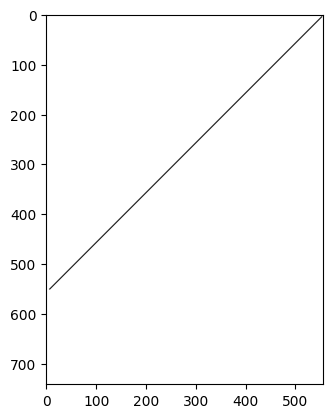

In [3]:
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import math
import cv2

def detect_edges(image, threshold=100, min_line_length=50, max_line_gap=20):
    """
    Detects the edges in the input image using the Hough Transform.
    
    Parameters:
    image (PIL.Image.Image): Input image.
    threshold (int): The minimum number of intersections required to detect a line.
    min_line_length (int): The minimum length of a line segment in pixels.
    max_line_gap (int): The maximum gap in pixels between connectable line segments.
    
    Returns:
    PIL.Image.Image: Image with detected edges.
    """
    # Convert the image to grayscale
    gray_image = image.convert('L')
    
    # Find the edges using the Canny edge detector
    edges = np.array(gray_image.getdata(), dtype=np.uint8).reshape(gray_image.size)
    edges = cv2.Canny(edges, 100, 200)
    
    # Use the Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    # Draw the detected lines on a new image
    output_image = Image.new('RGB', image.size, (255, 255, 255))
    draw = ImageDraw.Draw(output_image)
    
    for line in lines[0]:
        x1, y1, x2, y2 = line
        draw.line((x1, y1, x2, y2), fill=(0, 0, 0), width=2)
    
    return output_image

# Example usage
input_image = Image.open('Vp.jpg')
output_image = detect_edges(input_image)
output_image.save('output_image.jpg')
plt.imshow(output_image)

# 12. write and execute program for geometric transformation of image

# a.Translation

# b.Scaling

# c.Rotation 
# d.Shrinking 
# e.Zooming: zero order, first order and interpolation method

In [1]:
from PIL import Image
import numpy as np


def translation(img, tx, ty):
    """
    Performs translation on the input image.
    
    Parameters:
    img (PIL.Image.Image): Input image.
    tx (int): Translation in x-direction.
    ty (int): Translation in y-direction.
    
    Returns:
    PIL.Image.Image: Translated image.
    """
    return img.transform(img.size, Image.AFFINE, (1, 0, tx, 0, 1, ty))

def scaling(img, sx, sy):
    """
    Performs scaling on the input image.
    
    Parameters:
    img (PIL.Image.Image): Input image.
    sx (float): Scaling factor in x-direction.
    sy (float): Scaling factor in y-direction.
    
    Returns:
    PIL.Image.Image: Scaled image.
    """
    return img.resize((int(img.width*sx), int(img.height*sy)), resample=Image.BICUBIC)

def rotation(img, angle):
    """
    Performs rotation on the input image.
    
    Parameters:
    img (PIL.Image.Image): Input image.
    angle (float): Rotation angle in degrees.
    
    Returns:
    PIL.Image.Image: Rotated image.
    """
    return img.rotate(angle, resample=Image.BICUBIC)

def shrinking(img, sx, sy):
    """
    Performs shrinking on the input image.
    
    Parameters:
    img (PIL.Image.Image): Input image.
    sx (float): Shrinking factor in x-direction.
    sy (float): Shrinking factor in y-direction.
    
    Returns:
    PIL.Image.Image: Shrunken image.
    """
    return img.resize((int(img.width*sx), int(img.height*sy)), resample=Image.BICUBIC)

def zooming(img, method, zoom_factor):
    """
    Performs zooming on the input image using the specified method.
    
    Parameters:
    img (PIL.Image.Image): Input image.
    method (str): Zooming method ('nearest', 'bilinear', 'bicubic').
    zoom_factor (float): Zoom factor.
    
    Returns:
    PIL.Image.Image: Zoomed image.
    """
    if method == 'nearest':
        resample = Image.NEAREST
    elif method == 'bilinear':
        resample = Image.BILINEAR
    elif method == 'bicubic':
        resample = Image.BICUBIC
    else:
        raise ValueError("Invalid zooming method. Choose 'nearest', 'bilinear', or 'bicubic'.")
    
    return img.resize((int(img.width*zoom_factor), int(img.height*zoom_factor)), resample=resample)

# Example usage
image = Image.open('img.jpg')

# Translation
translated_image = translation(image, 50, 30)
translated_image.save('translated_image.jpg')
translated_image.show()


# Scaling
scaled_image = scaling(image, 1.5, 0.8)
scaled_image.save('scaled_image.jpg')
scaled_image.show()

# Rotation
rotated_image = rotation(image, 45)
rotated_image.save('rotated_image.jpg')
rotated_image.show()

# Shrinking
shrunken_image = shrinking(image, 0.7, 0.5)
shrunken_image.save('shrunken_image.jpg')
shrunken_image.show()

# Zooming
nearest_zoomed_image = zooming(image, 'nearest', 1.2)
nearest_zoomed_image.save('nearest_zoomed_image.jpg')
nearest_zoomed_image.show()

bilinear_zoomed_image = zooming(image, 'bilinear', 1.2)
bilinear_zoomed_image.save('bilinear_zoomed_image.jpg')
bilinear_zoomed_image.show()

bicubic_zoomed_image = zooming(image, 'bicubic', 1.2)
bicubic_zoomed_image.save('bicubic_zoomed_image.jpg')
bicubic_zoomed_image.show()